In [3]:
import torch
import numpy as np
import os
from PIL import Image, ImageFilter
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import torchvision.transforms as transforms 
from itertools import groupby
from operator import itemgetter

In [4]:
car_flow = []
person_flow = []
car_person_flow = []

In [5]:
seg_dir = '/data/agong/train/deeplab/'
# strasbourg_000000_000046_leftImgseg.png
flow_dir = '/data/agong/train/flow_npz/'
# strasbourg_000000_000055_flow.npy
large_flow_dir = '/data/agong/train/large_flow/'

In [6]:
car_col = np.array([0,0,142])
truck_col = np.array([0,0,70])
bus_col = np.array([0,60,100])
train_col = np.array([0,80,100])

person_col = np.array([220,20,60])

In [14]:
cities = [c for c in os.listdir(flow_dir)]
print(cities)
# leftImg

for city in cities:
    print(city)
#     if not os.path.isdir(os.path.join(large_flow_dir,city)):
#         os.makedirs(os.path.join(large_flow_dir,city))

    p_ = os.path.join(flow_dir, city)   # flow dir   /data/agong/train/flow_npz/aachen
    q_ = os.path.join(seg_dir, city)    # seg dir    /data/agong/train/deeplab_label/aachen
#     r_ = os.path.join(large_flow_dir, city)   # useless flow dir

    ff = [f for f in os.listdir(p_) if f.endswith('flow.npy')]
    for idx,fff in enumerate(ff):
#     for fff in ff:
        if idx%100 == 0:
            print(idx)
        ffs = '_'.join(fff.split('_')[:-1])+'_leftImgseg.png'
        a = np.array(Image.open(os.path.join(q_,ffs)))

        ffz = np.load(os.path.join(p_,fff))
        ffz = np.linalg.norm(ffz, axis=0)
#         print('ffz',ffz.shape)
        
        # for cars
        mask = np.multiply.reduce(a==car_col,2).astype(np.bool)
#         print('mask',mask.shape)
#         mask = mask or np.multiply.reduce(a==bus_col).astype(np.bool)
#         mask = mask or np.multiply.reduce(a==train_col).astype(np.bool)
        b = ffz[mask]
        if b.size==0:
            car_ff = 0
        else:
            car_ff = np.mean(b)
        car_flow.append(car_ff)
        
        # for person
        mask = np.multiply.reduce(a==person_col,2).astype(np.bool)
        b = ffz[mask]
        if b.size==0:
            person_ff = 0
        else:
            person_ff = np.mean(b)
        person_flow.append(person_ff)
        
        car_person_flow.append(car_ff+person_ff)
        
    break


['hanover', 'ulm', 'hamburg', 'aachen', 'darmstadt', 'cologne', 'weimar', 'tubingen', 'erfurt', 'dusseldorf', 'krefeld', 'bremen', 'stuttgart', 'jena', 'zurich', 'monchengladbach', 'strasbourg', 'bochum']
hanover
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200


(array([388., 440., 457., 376., 340., 285., 273., 208., 192., 158., 178.,
        144., 123., 102., 149., 148., 140., 140., 121., 127., 132., 125.,
        109., 100., 112., 109., 124.,  66.,  96.,  72.,  70.,  53.,  40.,
         33.,  25.,  28.,  23.,  20.,  19.,  14.,  18.,  11.,   9.,  10.,
         10.,  10.,   9.,   7.,   8.,   3.,   4.,   4.,   2.,   7.,   5.,
          5.,   3.,   5.,   1.,   6.,   8.,   6.,   8.,  17.,  12.,   3.,
          4.,   2.,   0.,   9.,   3.,   0.,   2.,   1.,   5.,   2.,   2.,
          0.,   7.,   0.,   1.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,
          3.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.]), array([  0.        ,   2.76397095,   5.52794189,   8.29191284,
         11.05588379,  13.81985474,  16.58382568,  19.34779663,
         22.11176758,  24.87573853,  27.63970947,  30.40368042,
         33.16765137,  35.93162231,  38.69559326,  41.45956421,
         44.22353516,  46.9875061 ,  49.75147705,  52.515448  ,

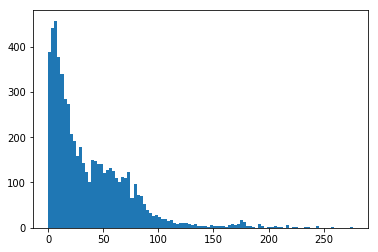

In [18]:
plt.hist(car_flow,bins=100)

(array([687., 413., 590., 587., 631., 470., 426., 348., 283., 199., 146.,
        129., 120., 101.,  89.,  85.,  73.,  67.,  45.,  53.,  30.,  32.,
         24.,  24.,  25.,  31.,  24.,  19.,  33.,  27.,  14.,  20.,  13.,
          9.,  10.,  12.,  11.,  19.,  15.,  20.,  10.,  11.,  10.,   7.,
         12.,   4.,   4.,   4.,   3.,   8.,   6.,   8.,   4.,   5.,   0.,
          2.,   3.,   1.,   1.,   2.,   4.,   4.,   0.,   0.,   0.,   1.,
          0.,   0.,   1.,   0.,   0.,   0.,   2.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]), array([  0.        ,   2.70808044,   5.41616089,   8.12424133,
         10.83232178,  13.54040222,  16.24848267,  18.95656311,
         21.66464355,  24.372724  ,  27.08080444,  29.78888489,
         32.49696533,  35.20504578,  37.91312622,  40.62120667,
         43.32928711,  46.03736755,  48.745448  ,  51.45352844,

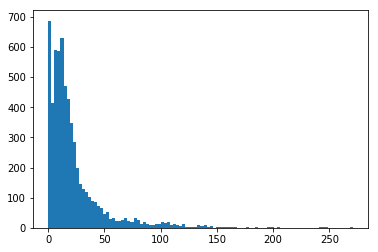

In [20]:
plt.hist(person_flow,bins=100)

(array([152., 196., 273., 508., 450., 355., 354., 324., 285., 350., 300.,
        264., 232., 261., 219., 215., 188., 143., 121.,  87.,  65.,  81.,
         63.,  77.,  45.,  39.,  19.,  27.,  22.,  28.,  32.,  26.,  22.,
         15.,  25.,  21.,   8.,  17.,  17.,   7.,   7.,   7.,   9.,   9.,
          4.,   7.,   3.,   7.,   5.,   5.,   2.,   2.,   3.,   0.,   4.,
          3.,   1.,   6.,   5.,  11.,  12.,   1.,   2.,   0.,   1.,   3.,
          1.,   0.,   1.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,
          1.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([1.32948384e-01, 5.27583582e+00, 1.04187233e+01, 1.55616107e+01,
        2.07044981e+01, 2.58473856e+01, 3.09902730e+01, 3.61331604e+01,
        4.12760479e+01, 4.64189353e+01, 5.15618227e+01, 5.67047102e+01,
        6.18475976e+01, 6.69904850e+01, 7.21333725e+01, 7.72762599e+01,
        8.24191473e+01, 8.7562

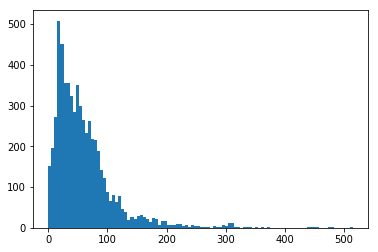

In [22]:
plt.hist(car_person_flow,bins=100)